<a href="https://colab.research.google.com/github/vinivijayan1/Google-co-lab-pages/blob/main/Day_5_Covid_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/My Drive/CovidDataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Completed")

Completed


In [ ]:
from keras.layers import *
from keras.models import * 
import keras as tf

In [ ]:
#Training model
model = Sequential()   ## creating a blank model
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))    ### reduce the overfitting
 
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())    ### input layer
model.add(Dense(64,activation='relu'))    ## hidden layer of ann
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))   ## output layer
 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#Moulding train images
from tensorflow.keras.preprocessing import image
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)
 
test_dataset = image.ImageDataGenerator(rescale=1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)

In [ ]:
#Reshaping test and validation images 
train_generator = train_datagen.flow_from_directory(
    '/content/CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')
validation_generator = test_dataset.flow_from_directory(
    '/content/CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
#### Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=7,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps=1
)

Epoch 1/20
7/7 [==============================] - 41s 2s/step - loss: 0.7601 - accuracy: 0.4995 - val_loss: 0.6912 - val_accuracy: 0.5625
Epoch 2/20
7/7 [==============================] - 10s 2s/step - loss: 0.6877 - accuracy: 0.5500 - val_loss: 0.6877 - val_accuracy: 0.8438
Epoch 3/20
7/7 [==============================] - 10s 2s/step - loss: 0.6819 - accuracy: 0.5339 - val_loss: 0.6642 - val_accuracy: 0.9688
Epoch 4/20
7/7 [==============================] - 10s 2s/step - loss: 0.6428 - accuracy: 0.6092 - val_loss: 0.5601 - val_accuracy: 0.7500
Epoch 5/20
7/7 [==============================] - 11s 2s/step - loss: 0.4501 - accuracy: 0.8140 - val_loss: 0.4289 - val_accuracy: 0.8125
Epoch 6/20
7/7 [==============================] - 10s 2s/step - loss: 0.4001 - accuracy: 0.7934 - val_loss: 0.2103 - val_accuracy: 0.9688
Epoch 7/20
7/7 [==============================] - 10s 2s/step - loss: 0.2542 - accuracy: 0.9126 - val_loss: 0.1062 - val_accuracy: 0.9688
Epoch 8/20
7/7 [==================

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/content/xray.jpeg',target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
ypred = model.predict(img)
if ypred[0][0] == 1:
  print("Covid Negative")
else:
  print("Covid Positive")

Covid Positive


In [ ]:
ypred[0][0]

0.0

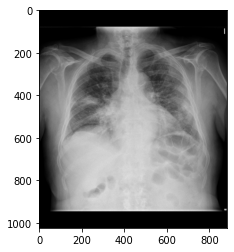

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/content/xray.jpeg")
cv2.imwrite("myimage.jpg",img)
plt.imshow(img)
plt.show()

In [ ]:
model.save("covid.h5")

In [ ]:
import keras as tf
mymodel = tf.models.load_model("/content/covid.h5")

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/content/xray.jpeg',target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
ypred = mymodel.predict(img)
if ypred[0][0] == 1:
  print("Covid Negative")
else:
  print("Covid Positive")

Covid Positive
